In [1]:
!pip install easyocr

In [2]:
import matplotlib.pyplot as plt     #for plotting
import cv2                            # Computer vision library --->Used to perform various task like,object detection ,landmark detection ,text detection
import easyocr                      #Allow computer vision developers to perform Optical character recognition 
from  pylab import rcParams         #pylab is used for bulk imports matplotlib.pyplot and Numpy(mathematical operation) in a single namespace.  
import pandas as pd                 # rcParams --->With this we can control of every defaults of almost every property of matplotlib 
#from IPython.display import Image    # Ipython ---> just regular Python import 
rcParams['figure.figsize']=8,16  # 

In [3]:
reader=easyocr.Reader(['en'])  #easyocr contains 40 languages , en---> used for english 

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Enter your image link : D:\DAIICT\Pyhton Project\image5.jpg
Extracted total text in the image are:
 0     Knowing when to
1                 say
2                  no
3       and saying it
4    is a life skill.
Name: 1, dtype: object


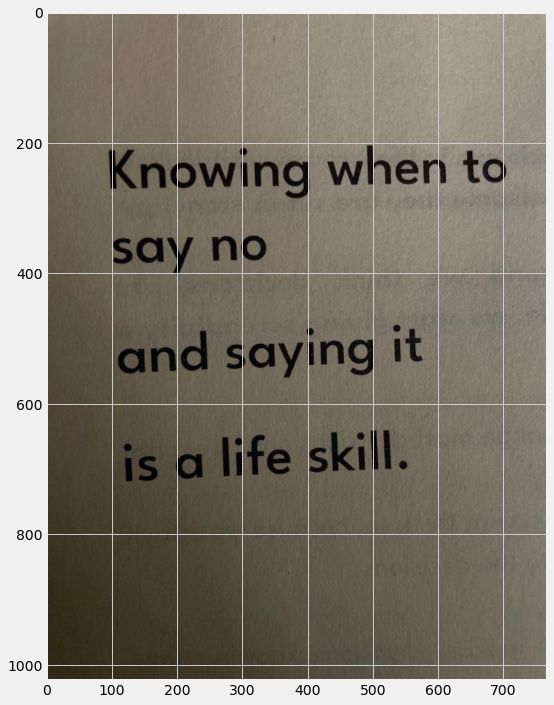

In [202]:

def show_image(path):
  image=plt.imread(path)
  x=plt.imshow(image)

def text_extraction(path):
  output=reader.readtext(path)
  df = pd.DataFrame(output)
#   count_row=df[0]
  print("Extracted total text in the image are:\n",df[1])
  return output

def text_in_image(path, output):
    x=int(input("Enter text number to point out it in a image :"))
    cord=output[x][0]
    x_min , y_min=[min(i) for i in zip(*cord)]
    x_max , y_max=[max(j) for j in zip(*cord)]
    image=cv2.imread(path)
    cv2.rectangle(image,(x_min , y_min),(x_max , y_max) ,(0,0,400),3) 
    x=plt.imshow(cv2.cvtColor(image ,cv2.COLOR_BGR2RGB))

path=input("Enter your image link : ")
show_image(path)
output = text_extraction(path)
#text_in_image(path, output)

Enter text number to point out it in a image :3


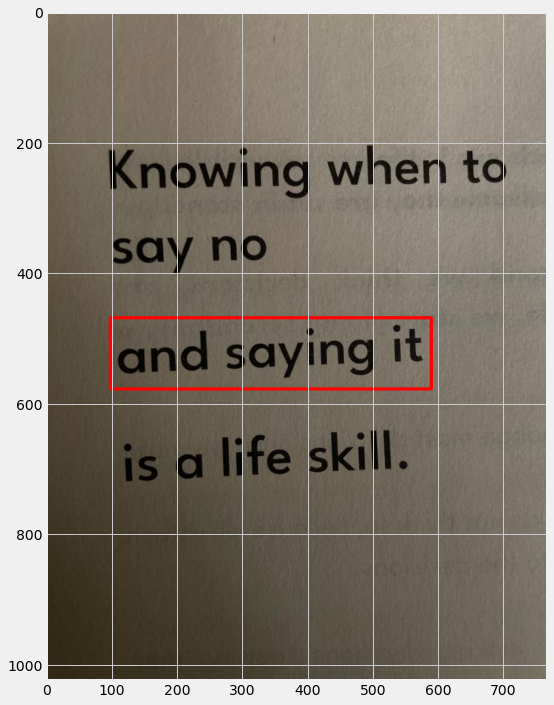

In [203]:
text_in_image(path, output)

Enter your image link : D:\DAIICT\Pyhton Project\image6.jpg
Extracted total text in the image are:
 0                       G6
1             When you get
2    tired, learn to rest,
3                      not
4                    quit:
5                   BANKSY
Name: 1, dtype: object


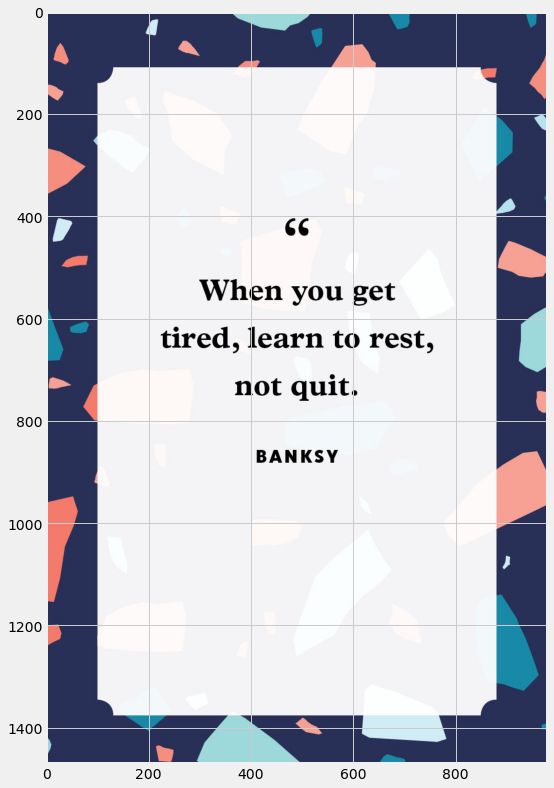

In [204]:
path=input("Enter your image link : ")
show_image(path)
output = text_extraction(path)

Enter text number to point out it in a image :4


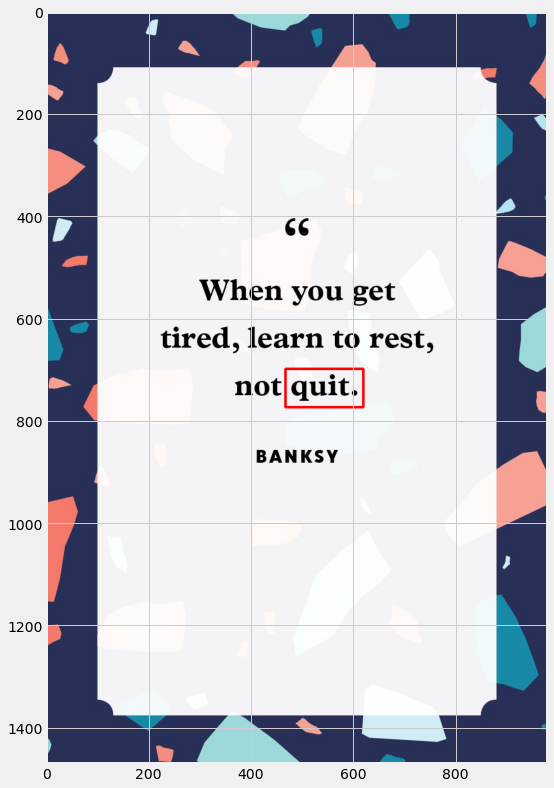

In [205]:
text_in_image(path, output)

In [2]:
pip install SpeechRecognition

Note: you may need to restart the kernel to use updated packages.


In [3]:
import speech_recognition as sr
import webbrowser as wb

rec = sr.Recognizer()

In [5]:
# Module to open the diffrent pages from speech.

def openyoutube():
    # Opening Log file
    file = open('D:\DAIICT\Pyhton Project\YoutubeSpeech.txt','a')
    url = 'https://www.youtube.com/results?search_query='

    with sr.Microphone() as mic :
        print("What to search? : ")
        # Listening query to search
        audio = rec.listen(mic)
        try:
            search = rec.recognize_google(audio)
            # Writing query in the log file.
            file.write(search+"\n")
            print(f"Searching on youtube : {search}")
            # To open the youtube query in the browser
            wb.get().open(url+search)
        except:
            print("Couldn't Recognise the audio :(")

    # Closing Log File
    file.close()

    
def googlesearch():
    file = open('D:\DAIICT\Pyhton Project\Google_Search.txt','a')
    url = 'https://www.google.com/search?q='

    with sr.Microphone() as mic :
        print("What you want to search? : ")
        audio = rec.listen(mic)
        try:
            search = rec.recognize_google(audio)
            file.write(search+"\n")
            print(f"Searching on google : {search}")
            # To open the youtube query in the browser
            wb.get().open(url+search)
            
        except:
            print("Couldn't Recognise the audio :(")

    file.close()

In [209]:
# Opening the log file, new file will be created if not exist
file = open('D:\DAIICT\Pyhton Project\Speech.txt','a')

# With the 'mic' alias for sr.Micrphone() 
with sr.Microphone() as mic :
    print("Adjusting and clearing the background noise...")
    # Removing background noises
    rec.adjust_for_ambient_noise(mic, duration=2)
    print("Please Speak : ")
    # Listening the audio from microphone
    audio = rec.listen(mic)

    # Exception Handling
    try:
        # Using google api to convert audio into text
        text = rec.recognize_google(audio)
        # Writing the text in the log file for the log/history
        file.write(text+"\n")
        if text.lower() == 'open youtube':
            openyoutube() # User defined function to open youtube
        elif text.lower() == 'open google':
            googlesearch() # User defined function to open google
        else:
            print(f"Your speech : {text}")
    except:
        print("Couldn't Recognise the audio :(")

# Closing log file
file.close()

Adjusting and clearing the background noise...
Please Speak : 
Your speech : hello how are you


In [60]:
pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=4cf4610808b220e3200a2df25422ae0fdbe42b4f0dae26dfdb9bba16ce792ed1
  Stored in directory: c:\users\dhruv\appdata\local\pip\cache\wheels\87\a9\a3\c190a7e0872639762e92cf3a84d6845ed086e10966533faf42
Successfully built pytrends
Note: you may need to restart the kernel to use updated packages.


In [175]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
trends = TrendReq()

In [176]:
trends.trending_searches(pn='india')

,0
0,Jitendra Awhad
1,Doodle for Google India winner
2,Dexter
3,BPSC
4,Krishna
5,Cristiano Ronaldo
6,बाल दिवस
7,Kaynes technology IPO GMP
8,Rafael Nadal
9,Sunil Shende


In [195]:
# Payload stores all the parameters that is to be sent to the server
trends.build_payload(kw_list=["Covid"],geo='IN')
# Fetching data with respect to the region
data = trends.interest_by_region()
data = data.sort_values(by="Covid", ascending=False)
data = data.head(15)
print(data)

                             Covid
geoName                           
Mizoram                        100
Goa                            100
Andaman and Nicobar Islands     96
Nagaland                        92
Sikkim                          88
Meghalaya                       85
Kerala                          84
Dadra and Nagar Haveli          83
Tripura                         82
Delhi                           81
Karnataka                       78
Uttarakhand                     75
Jammu and Kashmir               73
Jharkhand                       72
Manipur                         71


In [158]:
data1 = pd.DataFrame(data)
data1.index

Index(['Goa', 'Andaman and Nicobar Islands', 'Mizoram', 'Sikkim', 'Meghalaya',
       'Nagaland', 'Delhi', 'Tripura', 'Kerala', 'Karnataka', 'Uttarakhand',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Jharkhand',
       'Jammu and Kashmir'],
      dtype='object', name='geoName')

In [190]:
data = TrendReq(hl='en-US', tz=360) # hl-language, tz-timezone
# Building payload
data.build_payload(kw_list=['Covid'])
# Fetching data over timeline
data = data.interest_over_time()
# Plotting Covid Data
print(data)

            Covid  isPartial
date                        
2017-11-19      0      False
2017-11-26      0      False
2017-12-03      0      False
2017-12-10      0      False
2017-12-17      0      False
...           ...        ...
2022-10-09     11      False
2022-10-16     11      False
2022-10-23     10      False
2022-10-30      9      False
2022-11-06      9       True

[260 rows x 2 columns]


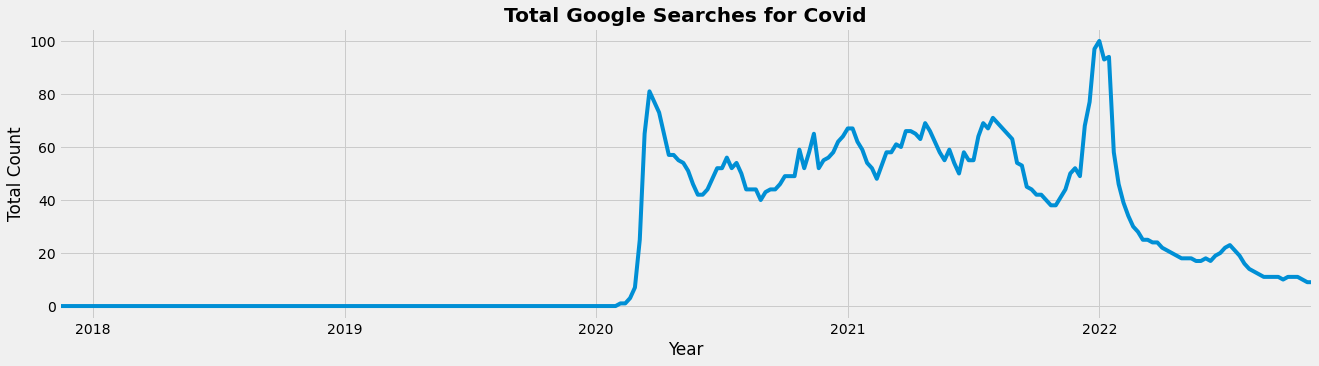

In [191]:
data['Covid'].plot(figsize=(20, 5))
plt.title('Total Google Searches for Covid', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

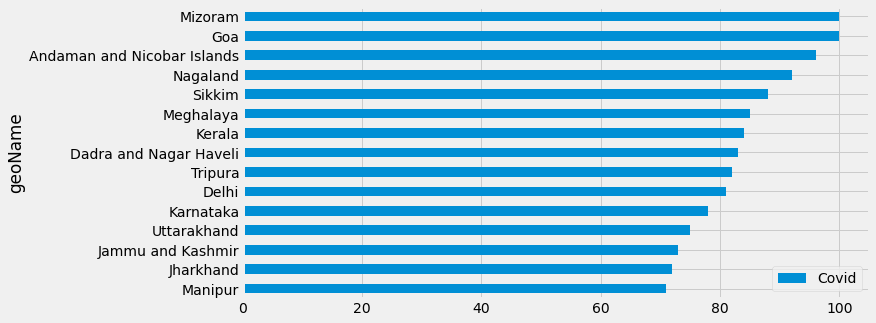

In [196]:
data[::-1].reset_index().plot(x="geoName", y="Covid",figsize=(10,5), kind="barh")
plt.style.use('fivethirtyeight') # Stlyes for the graphs
plt.show()

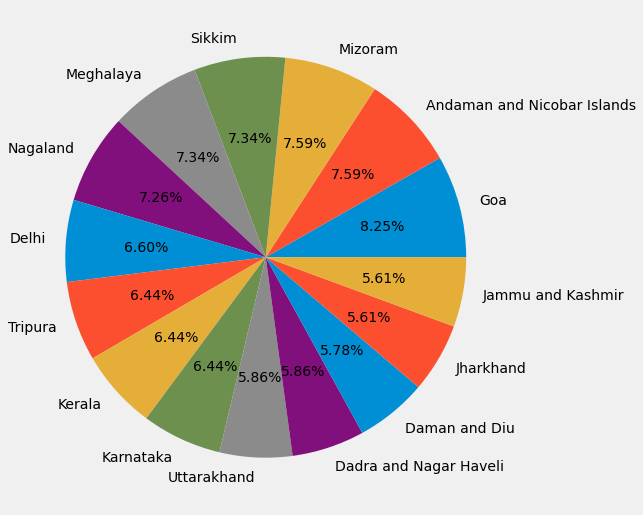

In [197]:
plt.pie(data['Covid'],labels = data1.index,autopct='%1.2f%%')
plt.show()

In [156]:
rel = trends.related_queries()
related = rel['Covid']['rising']
related.columns

Index(['query', 'value'], dtype='object')

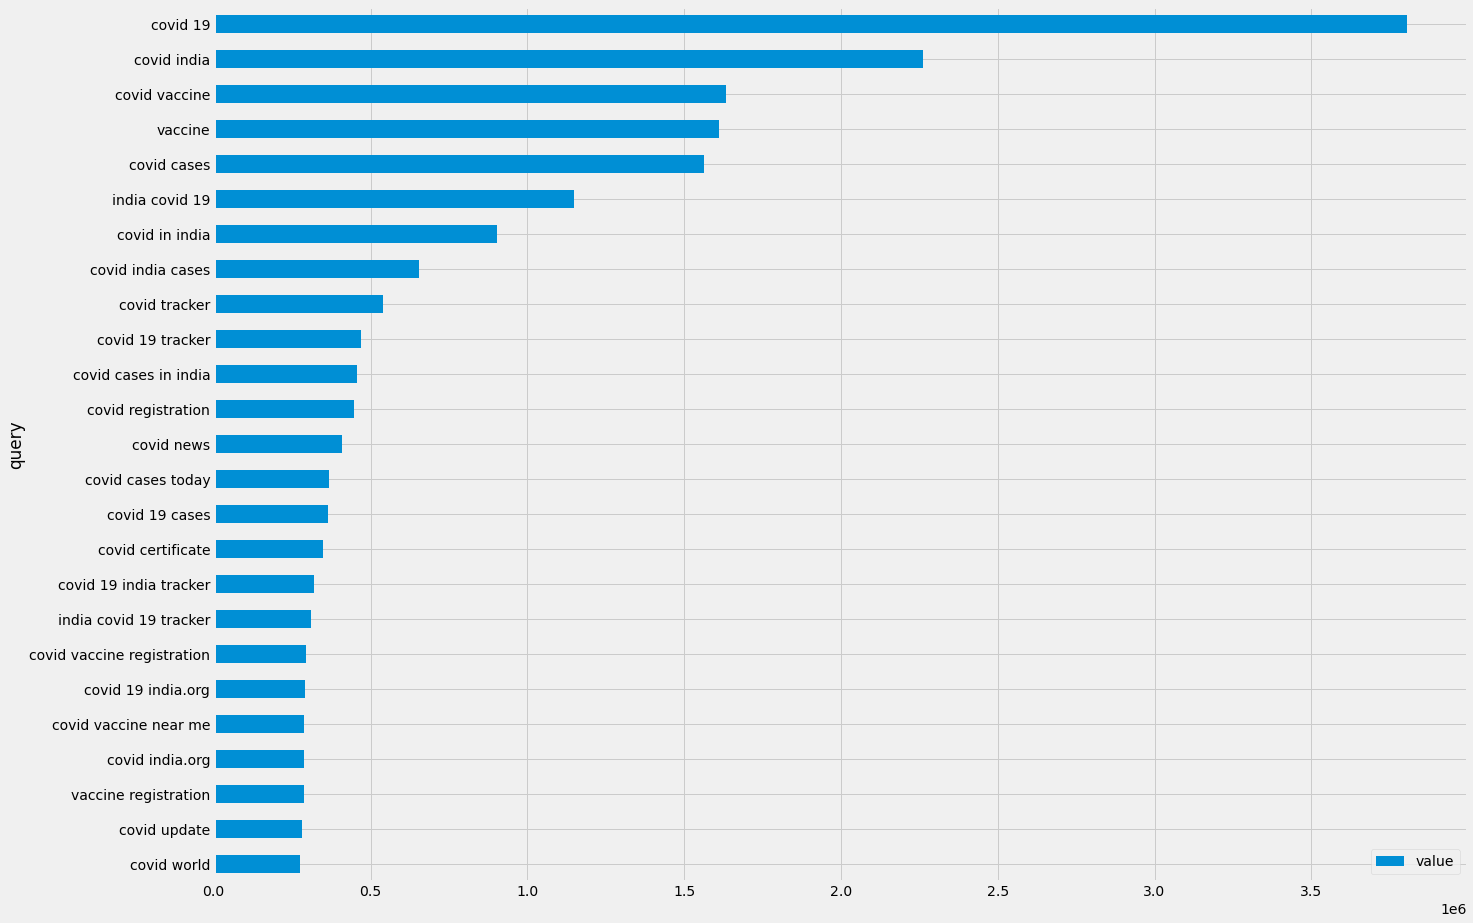

In [174]:
related[::-1].reset_index().plot(x="query", y="value",figsize=(20,15), kind="barh")
plt.style.use('fivethirtyeight')
plt.show()

In [75]:
def timeline(query):
    trend = TrendReq(hl='en-US', tz=360)
    trend.build_payload(kw_list=[query])
    data = trend.interest_over_time()
    data[query].plot(figsize=(20, 10))
    plt.title(f'Total Google Searches for {query}', fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Total Count')
    plt.show()

In [76]:
def visualize():
    r=sr.Recognizer()
    with sr.Microphone() as source:
        r.adjust_for_ambient_noise(source,duration=1)
        print("Query : ")
        audio = r.listen(source)
        print("Done recording")
        try:
            text = r.recognize_google(audio)
            print(text)
            timeline(text)
        except:
            print("sorry could not recognize your voice")

Query : 
Done recording
data science


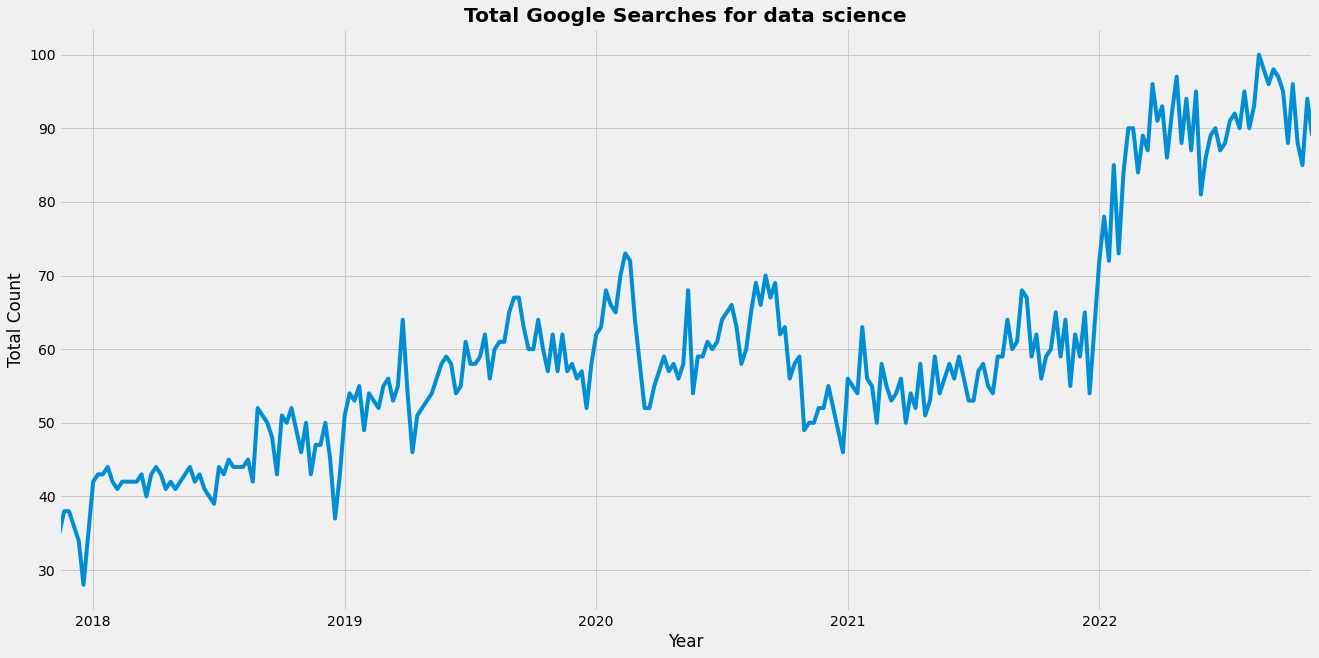

In [102]:
visualize()

Query : 
Done recording
python


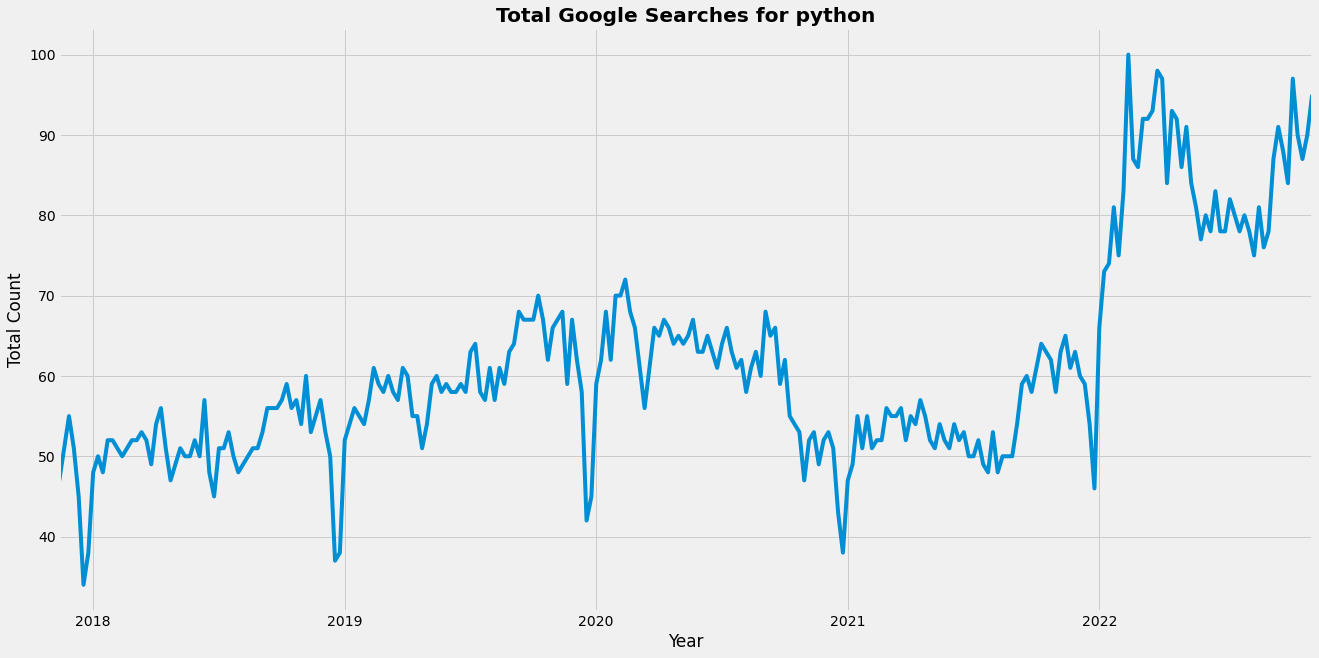

In [104]:
visualize()

Query : 
Done recording
dengue


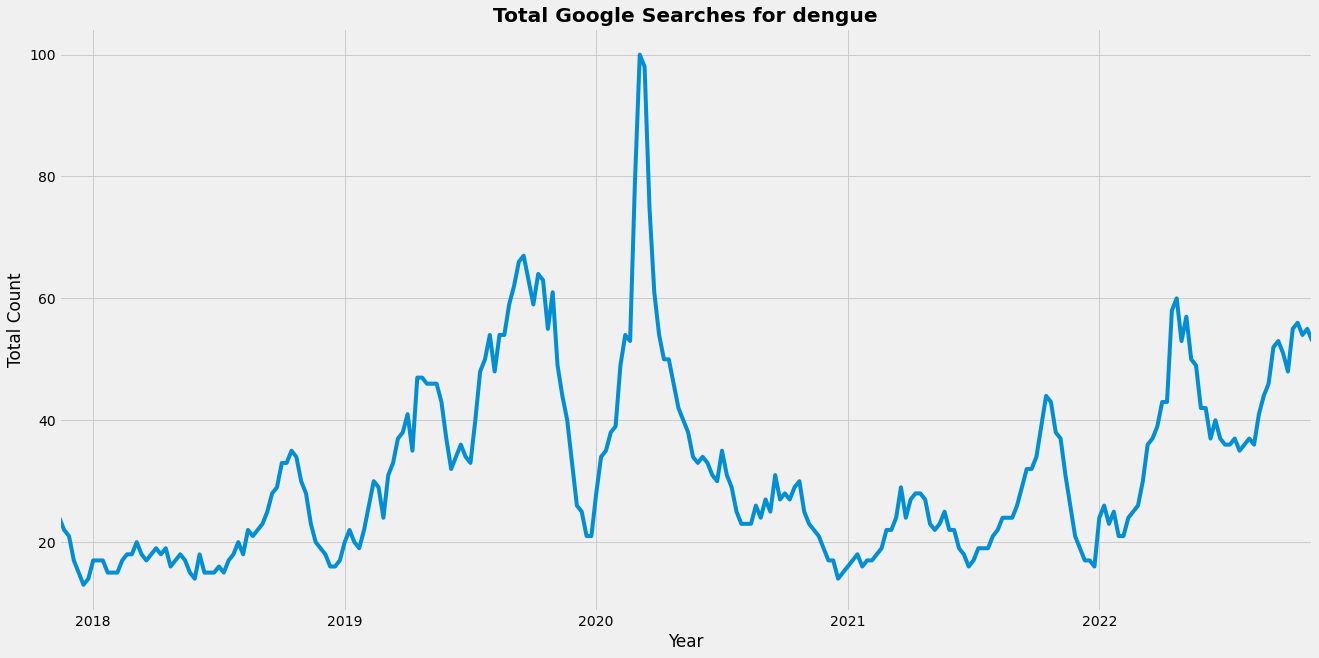

In [108]:
visualize()

Query : 
Done recording
react JS


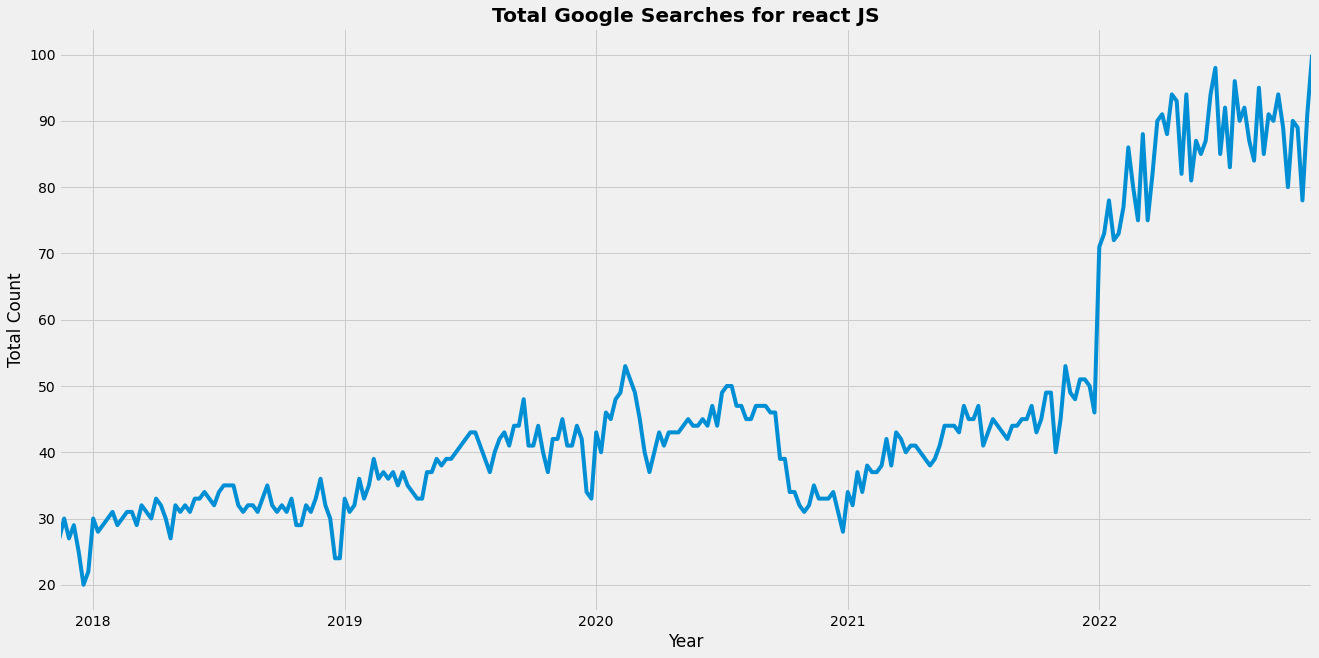

In [109]:
visualize()

In [201]:
data = TrendReq(hl='en-US', tz=360)
kw = ['Python','Java','React']
data.build_payload(kw_list=kw,geo='IN')
data = data.interest_by_region()
data = data.head(15)
data

,Python,Java,React
geoName,,,
Andaman and Nicobar Islands,41,46,13
Andhra Pradesh,46,48,6
Arunachal Pradesh,30,45,25
Assam,36,49,15
Bihar,31,55,14
Chandigarh,29,52,19
Chhattisgarh,41,45,14
Dadra and Nagar Haveli,43,41,16
Daman and Diu,41,43,16


<AxesSubplot:xlabel='geoName'>

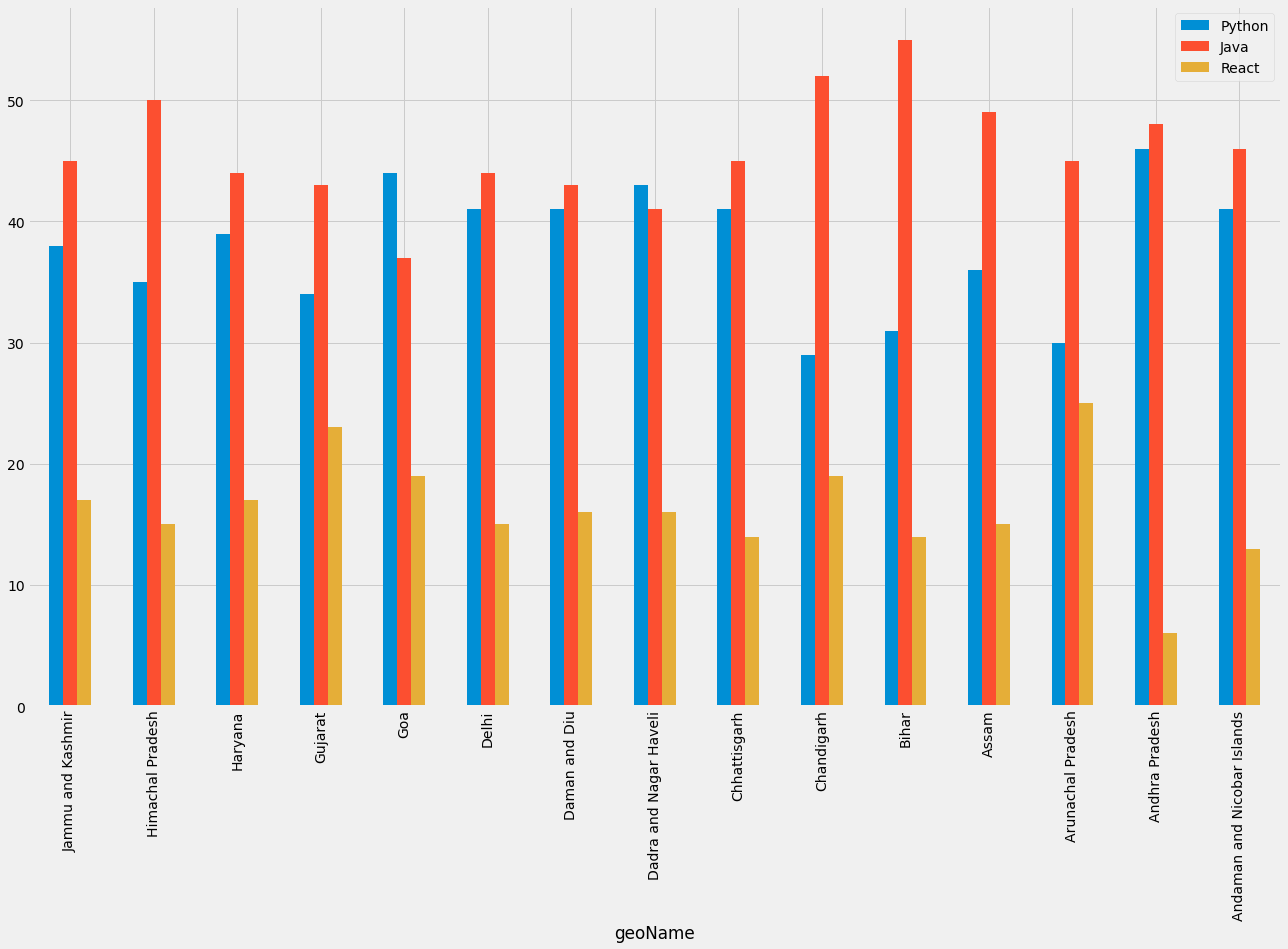

In [200]:
data[::-1].plot(figsize=(20, 12), y=kw, kind ='bar')

<AxesSubplot:xlabel='date'>

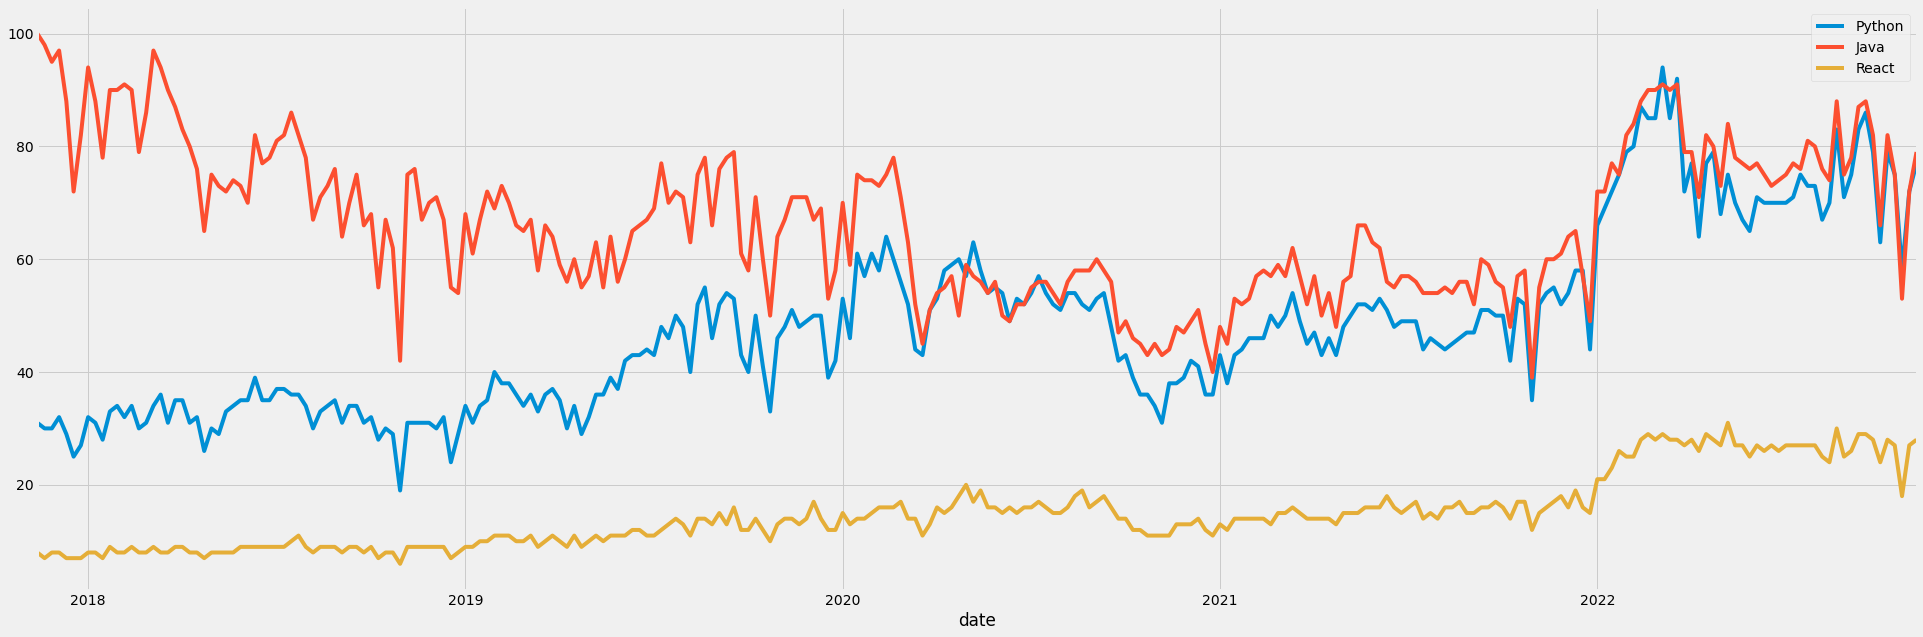

In [171]:
data = TrendReq(hl='en-US', tz=360)
kw = ['Python','Java','React']
data.build_payload(kw_list=kw,geo='IN')
data = data.interest_over_time()
data.plot(figsize=(30,10), y=kw)